In [1]:
import os
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from thon.churn import plot_eval

Add appts, [last month/year?], home sales[can't find current], and more stocks?

In [2]:
data = pd.read_csv("./data/out/features.csv")
len(data), len(data.columns)

(150, 75)

In [3]:
X, y = data.drop(columns = ['n']), data[['n']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, shuffle = False)

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state=69)

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
# use pipeline for all in future

In [6]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.5, 20, 0.5)},
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 0)

In [7]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5])},
             scoring='neg_mean_squared_error')

In [8]:
search.best_params_

{'model__alpha': 1.0}

In [9]:
coef = search.best_estimator_[1].coef_
coef[coef > 0]

array([ 3.1017408 ,  8.97701879,  1.9213401 ,  0.8648973 ,  2.83161397,
        4.1937608 ,  0.64071088,  8.74173881,  5.1021118 , 13.93429223,
        6.93264157,  0.50540581,  4.73886721,  4.80854354,  1.26997724,
       32.37888508, 11.25143462,  0.48575743,  1.71756233, 11.40551075,
        3.91392306, 13.37029975])

In [10]:
fin = X_train[X_train.columns[coef >  0]]
fout = X_test[X_test.columns[coef >  0]]

In [11]:
model = pipeline.fit(fin, y_train)

,unempt5w_lag12,ngspot_lag3,10yinf_lag12,sentiment_lag3,new_units_lag6,altsales_lag3,totalsa_lag3,overmanuf_lag6,fedsurplus_lag3,industry_lag9,...,XOM_v_lag6,TM_v_lag3,BWA_v_lag6,GT_lag3,GT_v_lag12,g_new_cars_lag3,g_car_for_sale_near_me_lag3,g_best_new_cars_lag9,g_how_to_buy_a_car_lag9,m_num
0,3338,5.83,1.36,74.4,1522.428212,10.669,10.893,3.3,-42634.000000,85.8149,...,501283200,16980097,41771900,13.34,148346000,71,19,0,0,4
1,3246,5.32,1.57,73.6,1146.711843,10.108,10.315,3.4,-220909.000000,88.8133,...,356438100,86416700,23583200,12.99,127342300,70,0,0,0,5
2,3114,4.29,1.86,73.6,1591.649564,11.553,11.772,3.5,-65387.000000,88.0479,...,648945000,34887200,17305900,12.64,117347300,85,0,0,0,6
3,3137,4.03,1.74,72.2,1935.115814,11.249,11.454,3.6,-82689.000000,87.6336,...,596474300,23745200,28746600,13.43,136747400,53,0,0,59,7
4,2940,4.14,1.82,73.6,1726.411924,11.821,12.030,3.4,-135927.000000,87.3115,...,534843200,20802600,28083700,11.90,104426400,72,0,0,100,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2123,2.61,1.62,76.9,3316.828749,16.024,16.492,3.7,-145266.263530,85.2377,...,449383491,3527876,57815220,10.42,121883254,37,53,51,30,2
131,3446,2.59,0.99,80.7,4726.811153,16.482,16.927,3.8,-143562.327439,93.0916,...,590861107,5634320,57233340,10.91,182976727,45,43,15,56,3
132,14251,2.71,1.10,79.0,3650.960286,16.822,17.327,4.0,-162832.489468,95.2942,...,630468906,6823083,83272944,10.55,125506149,51,100,49,45,4
133,3846,5.35,1.12,76.8,3413.253178,15.645,16.106,4.0,-310921.942505,98.3055,...,703572014,8287965,53781957,16.81,124768236,47,63,0,46,5


In [12]:
train_pred = pd.Series(model.predict(fin), index = fin.index)
test_pred = pd.Series(model.predict(fout), index = fout.index)

1777.602141725496
13.167423272040711


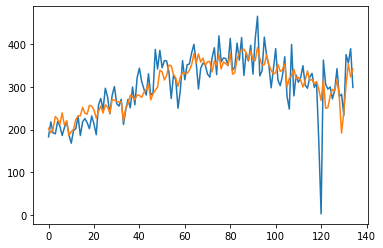

In [13]:
plot_eval(train_pred, y_train)

4222.754233584284
281.5169489056189


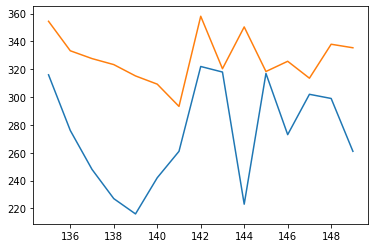

In [14]:
plot_eval(test_pred, y_test)

In [21]:
out = X_train.columns[coef > 0]
out

Index(['unempt5w_lag12', 'ngspot_lag3', '10yinf_lag12', 'sentiment_lag3',
       'new_units_lag6', 'altsales_lag3', 'totalsa_lag3', 'overmanuf_lag6',
       'fedsurplus_lag3', 'industry_lag9', 'AN_v_lag3', 'MZDAY_v_lag3',
       'XOM_v_lag6', 'TM_v_lag3', 'BWA_v_lag6', 'GT_lag3', 'GT_v_lag12',
       'g_new_cars_lag3', 'g_car_for_sale_near_me_lag3',
       'g_best_new_cars_lag9', 'g_how_to_buy_a_car_lag9', 'm_num'],
      dtype='object')

In [16]:
out.insert(0, 'n', y, True)
out.insert(0, 'month', X['month'], True)

In [17]:
out.to_csv("data/out/lasso.csv")